<a href="https://colab.research.google.com/github/Hermione69/tic-tac/blob/main/Realistic_Vision_V5_1_noVAE_Text_2_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This notebook lets you easily create images from text descriptions!**

**Just type what you want to see, and the AI will generate it for you.**

**You can even customize the look of the images by changing a few settings.**

*Note: This model only can generate realistic portrait photos*

[instructions (Must read)](https://docs.google.com/document/d/1lP2TBFXdPB3I1naZwoszX_CD4fa4a3wcXOq1sKYm6Nc/edit?usp=sharing)

[Tut video](https://gofile.io/d/FWPVAD)

`This Notebook Coded by Jubied with ❤`

**Have fun!**

---



In [1]:
# @title Run cell 01
!pip install diffusers["torch"] transformers
!pip install accelerate
!pip install git+https://github.com/huggingface/diffusers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.1/314.1 kB 6.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux

In [2]:
# @title Run cell 02 { display-mode: "form" }
!pip install peft
!pip install -U transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.6/251.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 26.3 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.41.2
    Uninstalling transformers-4.41.2:
      Successfully uninstalled transformers-4.41.2


In [3]:
# @title Run cell 03
import random
import torch
from diffusers import StableDiffusionPipeline
from diffusers import DPMSolverMultistepScheduler

pipe = StableDiffusionPipeline.from_pretrained("SG161222/Realistic_Vision_V5.1_noVAE", torch_dtype=torch.float16)
pipe = pipe.to("cuda")
# pipe.safety_checker = None
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config, algorithm_type="dpmsolver++", solver_type="midpoint")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.55k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

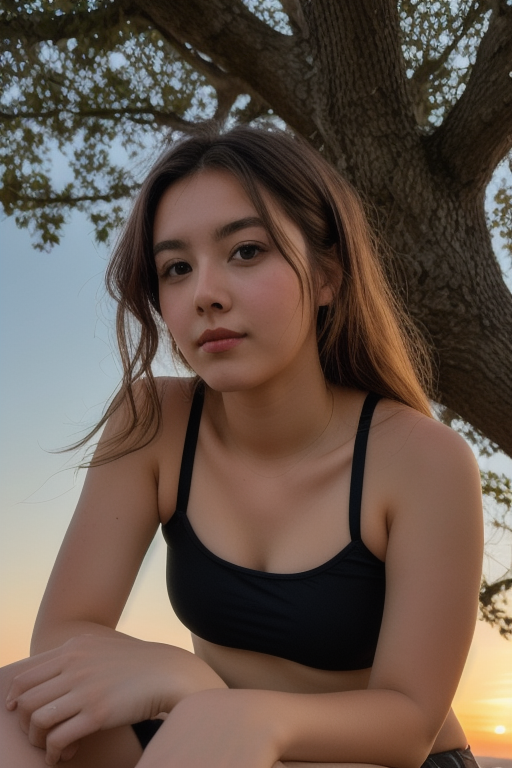

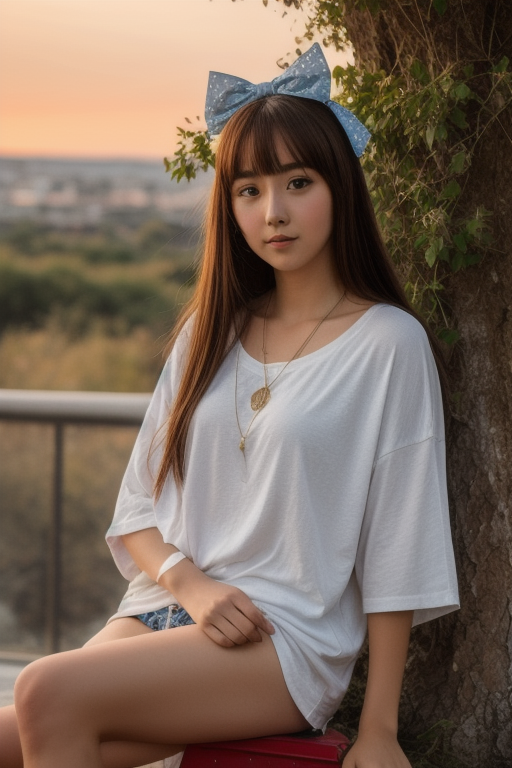

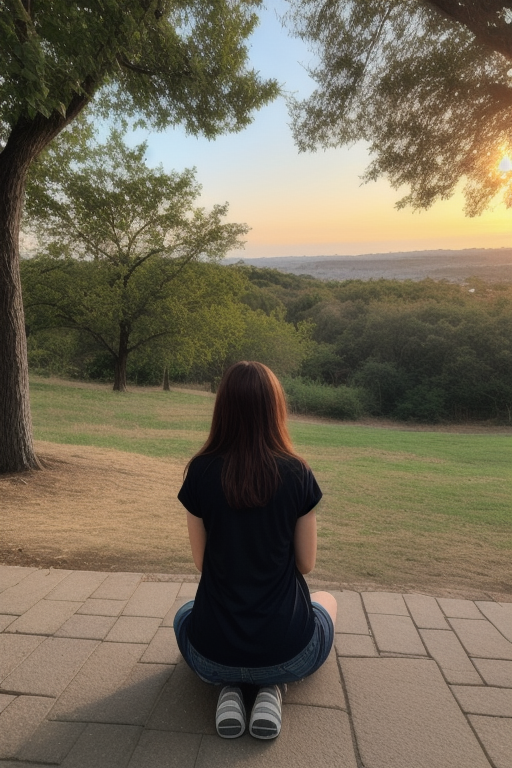

In [5]:
# @title Generate images { display-mode: "both" }
lora_path = "jubiedemon/Realistic-Eyes-Lora"
pipe.load_lora_weights(lora_path)

seed = random.randint(0, 2**32 - 1)
generator = torch.Generator("cuda").manual_seed(seed)

# edit start from here ⤵️

prompt = "8k , a girl sitting under tree watching beautiful sunset , anime, <lora:realistic_eyes:05>" # do not delete the lora part, lora will stay forever here you just update the prompt
w=512                     # 700
h=768                     # 700
steps=30                  # here your number of steps (more steps more better quality but your generation time will be longer)
guidance=3                # i've researched a lot and find number 3 guidance is perfect, you can play with it, but image quality will compromised
lora_weight=0.5           # ☠️ dont touch this one.
num_images=3              # 3
denoise=0.7               # ☠️ dont touch this one.
neg="((naked, nude, deformed iris, deformed pupils, semi-realistic, cgi, 3d, render, sketch, cartoon, drawing,, mutated hands and fingers:1.4), (deformed, distorted, disfigured:1.3), poorly drawn, bad anatomy, wrong anatomy, extra limb, missing limb, floating limbs, disconnected limbs, mutation, mutated, ugly, disgusting, amputation, watermark, deformed, distorted, disfigured, doll, poorly drawn, bad anatomy, wrong anatomy, bad anatomy, bad hands, missing fingers, extra digit, fewer digits, bad feet, extra fingers, mutated hands, poorly drawn hands, bad proportions, extra limbs, disfigured, bad anatomy, gross proportions, malformed limbs, missing arms, missing legs, extra arms, extra legs, mutated hands, fused fingers, too many fingers, long neck"
image = pipe(prompt, num_images_per_prompt=num_images, cross_attention_kwargs={"scale": lora_weight}, height=h, weight=w, num_inference_steps=steps, guidance_scale=guidance, negative_prompt=neg, denoising_end=denoise, clip_skip=2, generator=generator).images
for i in range(num_images):
    display(image[i])
